In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import beta

In [2]:
print("Enter the prior distribution parameters (α,β): ")
parameter = [int(x) for x in input().split()]

print("Enter first screening data (Like Total): ")
first_screen = [int(x) for x in input().split()]

print("Enter second screening data (Dislike Total): ")
second_screen = [int(x) for x in input().split()]

Enter the prior distribution parameters (α,β): 
2 2
Enter first screening data (Like Total): 
50 60
Enter second screening data (Dislike Total): 
34 50


## ``` Plot for the prior distribution of ‘p’```

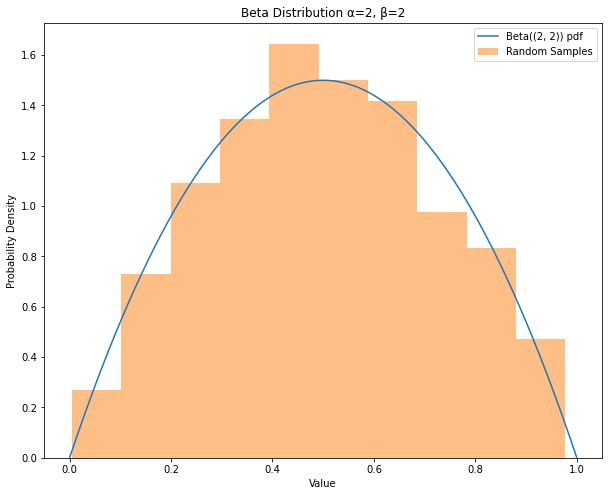

In [3]:
# prior distribution
beta_prior_distribution = beta(parameter[0],parameter[1])
random_samples = beta_prior_distribution.rvs(size=1000)
x = np.linspace(0,1,1000)
pdf = beta_prior_distribution.pdf(x)

# plotting the prior distribution
plt.figure(figsize=(10,8))
plt.plot(x,pdf,label=f'Beta({parameter[0],parameter[1]}) pdf')
plt.hist(random_samples,density=True,alpha=0.5,label='Random Samples')

plt.title(f'Beta Distribution α={parameter[0]}, β={parameter[1]}')
plt.xlabel('Value')
plt.ylabel("Probability Density")

plt.legend()
plt.show()

## ``` Plot for the posterior distribution of ‘p’ after the first screening```

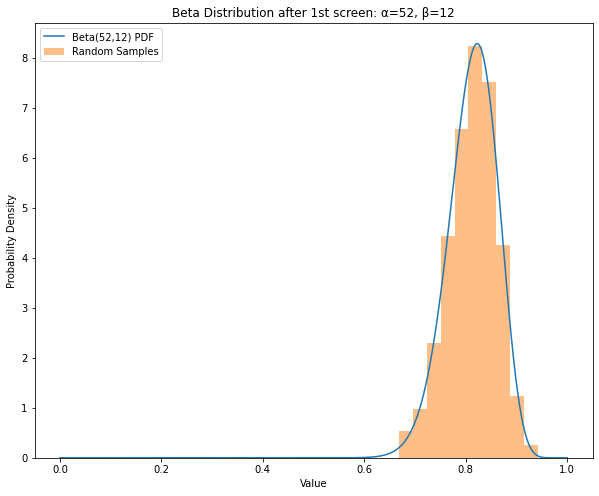

In [4]:
like = first_screen[0]
total = first_screen[1]

alpha_1 = parameter[0] + like
beta_1 = parameter[1] + total - like

beta_s1 = beta(alpha_1,beta_1)
random_samples = beta_s1.rvs(size=1000)
x = np.linspace(0,1,1000)
pdf = beta_s1.pdf(x)

plt.figure(figsize=(10,8))
plt.plot(x,pdf,label=f'Beta({alpha_1},{beta_1}) PDF')
plt.hist(random_samples, density=True, alpha=0.5, label='Random Samples')

plt.title(f'Beta Distribution after 1st screen: α={alpha_1}, β={beta_1}')
plt.xlabel('Value')
plt.ylabel('Probability Density')
plt.legend()
plt.show()

## ```Plot for the posterior distribution of ‘p’ after the second screening```

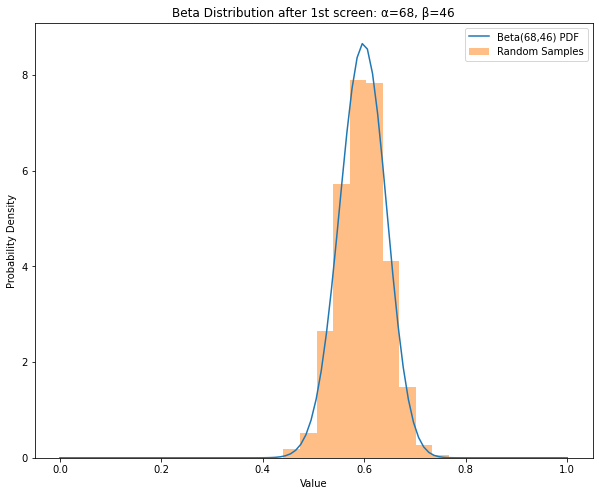

In [5]:
dislike = second_screen[0]
total = second_screen[1]
like = total - dislike

alpha_s2 = alpha_1 + like
beta_s2 = beta_1 + total - like

beta_distr_s2 = beta(alpha_s2,beta_s2)
random_samples = beta_distr_s2.rvs(size=1000)
x = np.linspace(0,1,100)
pdf = beta_distr_s2.pdf(x)

plt.figure(figsize=(10,8))
plt.plot(x,pdf,label=f'Beta({alpha_s2},{beta_s2}) PDF')
plt.hist(random_samples,density=True,alpha=0.5,label='Random Samples')

plt.title(f'Beta Distribution after 1st screen: α={alpha_s2}, β={beta_s2}')
plt.xlabel('Value')
plt.ylabel('Probability Density')
plt.legend()
plt.show()

## ```Explanation```

The posterior distribution of a Beta distribution can be found using Bayes' theorem. Given a Beta distribution with parameters α and β, and new data with parameters m (number of successes) and N (total number of trials), the posterior distribution is also a Beta distribution.

The posterior distribution of a Beta distribution can be found using Bayes' theorem. Given a Beta distribution with parameters α and β, and new data with parameters m (number of successes) and N (total number of trials), the posterior distribution is also a Beta distribution.

Let's denote the prior distribution as Beta(α, β), and the likelihood of the new data as Binomial(m; N, θ), where θ is the probability of success.

The posterior distribution is then given by:

$$
P(\theta | m, N) \propto P(m, N | \theta) \cdot P(\theta)
$$

Where:

$$
P(\theta | m, N) \space \space \text{is the posterior distribution.}
$$

$$
P(m, N | \theta) \space \space \text{is the likelihood of the data given the parameter θ, which is the probability mass function (PMF) of a binomial distribution.}
$$

$$
P(\theta) \space \space \text{is the prior distribution.}
$$

The posterior distribution can be proportional to a Beta distribution with updated parameters. The formula for the posterior distribution is:

$$
P(\theta | m, N) \propto \theta^{m + \alpha - 1} \cdot (1 - \theta)^{N - m + \beta - 1}
$$

This is the form of a Beta distribution with parameters

$$
\alpha' = m + \alpha \space\text{and} \space\beta' = N - m + \beta \space \text{. Therefore, the posterior distribution is Beta(α', β').}
$$